# 3. zápočtová úloha z 01RAD

## Popis úlohy

Datový soubor vychází z datasetu \texttt{House Sales in King County, USA}, který je k nalezení například na kaggle.com, nebo v knihovně \texttt{library(moderndive)} data \texttt{house\_prices}.
Původní dataset obsahuje prodejní ceny domů v oblasti King County, která obsahuje i město Seattle, a data byla nasbírána mezi květnem 2014 a květnem 2015. Pro naše potřeby bylo z datasetu vypuštěno jak několik proměnných, také byl dataset výrazně osekán a lehce modifikován.

Dále byl dataset již dopředu rozdělen na tři části, které všechny postupně v rámci 3. zápočtové úlohy využijete.


In [24]:
library(tidyverse)

In [25]:
house_rad <- read.table("https://raw.githubusercontent.com/francji1/01RAD/main/data/01RAD2022_house.csv",header=TRUE,sep=",")
head(house_rad)

,X,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,split
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,1,2395000,4,3.25,3800,19798,2.0,0,0,3,10,3800,0,1969,2009,3940,18975,train
2,2,2,679000,3,2.50,2770,9350,2.0,0,3,3,8,2770,0,1957,2000,2660,9695,train
3,3,3,664000,2,1.75,1720,5785,1.0,0,0,3,6,860,860,1948,2002,1680,5184,train
4,4,4,915000,5,2.50,2750,5589,1.5,0,0,5,9,1840,910,1910,0,1460,4250,train
5,5,5,450000,5,2.50,2850,209523,1.0,0,0,4,7,1930,920,1925,1968,2220,209523,train
6,6,6,305000,4,2.50,2320,4683,2.0,0,0,3,7,2320,0,2007,0,2230,5750,train


Data celkem obsahují  následujících 18 proměnných, přičemž naším cílem je prozkoumat vliv 12 z nich na cenu nemovitostí   * price}. Přičemž anglický popis jednotlivých proměnných (sloupců) je následující:

Feature & Description
 
  * id  : Our notation for a house  
 
  * price  : Price is prediction target  
 
  * bedrooms  : Number of Bedrooms/House  
 
  * bathrooms  : Number of Bathrooms/Bedrooms  
 
  * sqft\_living  : Square footage of the home  
 
  * sqft\_lot  : Square footage of the lot   
 
  * floors  :  Total floors (levels) in house 
 
  * waterfront  : House which has a view to a waterfront   
 
  * view  : Has been viewed  
 
  * condition  : How good the condition is Overall  
 
  * grade  : Overall grade given to the housing unit 
 
  * sqft\_above  : Square footage of house apart from basement   
 
  * sqft\_basement  : Square footage of the basement   
 
  * yr\_built  : Built Year   
 
  * yr\_renovated  : Year when house was renovated  
 
  * sqft\_living15  : Living room area in 2015 (implies– some renovations) 
 
  * sqft\_lot15  : lotSize area in 2015 (implies– some renovations)  
 
  * split  : Splitting variable with train, test and validation sample  


## Podmínky a body

Úkol i protokol vypracujte samostatně. Pokud na řešení nějaké úlohy budete přesto s někým spolupracovat, radit se, nezapomeňte to u odpovědi na danou otázku uvést. Tato zápočtová úloha obsahuje 10 otázek po 1 bodu. Celkem za 3 zápočtové úlohy bude možné získat 30 bodů, přičemž pro získání zápočtu je potřeba 20. Další dodatečné body mohu případně individuálně udělit za řešení mini domácích úkolů z jednotlivých hodin.

## Odevzdání

Protokol ve formátu pdf (včetně příslušného Rmd souboru) odevzdejte prostřednictvím MS Teams, nejpozději do 12:00 dne 5. 1. 2023.


## Průzkumová a grafická část:

* Otázka 01

  Ověřte rozměry datového souboru, typy jednotlivých proměnných,  a shrňte základní popisné charakteristiky všech proměnných. Vykreslete histogram a odhad hustoty pro odezvu   * price}, dá se z toho již něco odvozovat pro budoucí analýzu?
  
  \

In [26]:
list_of_packages <- c("corrplot", "car")
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

character(0)

[[1]]
 [1] "car"       "carData"   "corrplot"  "forcats"   "stringr"   "dplyr"    
 [7] "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse"
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"     

[[2]]
 [1] "car"       "carData"   "corrplot"  "forcats"   "stringr"   "dplyr"    
 [7] "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse"
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"

'data.frame':	2000 obs. of  19 variables:
 $ X            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ price        : num  2395000 679000 664000 915000 450000 ...
 $ bedrooms     : int  4 3 2 5 5 4 4 5 4 4 ...
 $ bathrooms    : num  3.25 2.5 1.75 2.5 2.5 2.5 2.75 3.5 3.25 2.75 ...
 $ sqft_living  : int  3800 2770 1720 2750 2850 2320 3110 2690 3180 2170 ...
 $ sqft_lot     : int  19798 9350 5785 5589 209523 4683 49765 4800 194278 9743 ...
 $ floors       : num  2 2 1 1.5 1 2 1 2 2 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 3 0 0 0 0 0 2 0 0 ...
 $ condition    : int  3 3 3 5 4 3 4 3 3 3 ...
 $ grade        : int  10 8 6 9 7 7 8 8 10 7 ...
 $ sqft_above   : int  3800 2770 860 1840 1930 2320 3110 1930 3180 2170 ...
 $ sqft_basement: int  0 0 860 910 920 0 0 760 0 0 ...
 $ yr_built     : int  1969 1957 1948 1910 1925 2007 1958 1919 2005 1995 ...
 $ yr_renovated : int  2009 2000 2002 0 1968 0 1972 1984 0 0 ...
 $ sqft_

       X                id             price            bedrooms    
 Min.   :   1.0   Min.   :   1.0   Min.   :  84000   Min.   :2.000  
 1st Qu.: 500.8   1st Qu.: 500.8   1st Qu.: 347838   1st Qu.:3.000  
 Median :1000.5   Median :1000.5   Median : 501500   Median :3.000  
 Mean   :1000.5   Mean   :1000.5   Mean   : 631575   Mean   :3.414  
 3rd Qu.:1500.2   3rd Qu.:1500.2   3rd Qu.: 750000   3rd Qu.:4.000  
 Max.   :2000.0   Max.   :2000.0   Max.   :8500000   Max.   :6.000  
   bathrooms     sqft_living       sqft_lot          floors     
 Min.   :1.00   Min.   :  105   Min.   :   690   Min.   :1.000  
 1st Qu.:1.75   1st Qu.: 1490   1st Qu.:  5040   1st Qu.:1.000  
 Median :2.25   Median : 1980   Median :  7689   Median :1.500  
 Mean   :2.18   Mean   : 2151   Mean   : 16048   Mean   :1.499  
 3rd Qu.:2.50   3rd Qu.: 2680   3rd Qu.: 11340   3rd Qu.:2.000  
 Max.   :4.75   Max.   :10040   Max.   :641203   Max.   :3.000  
   waterfront         view         condition         grade    

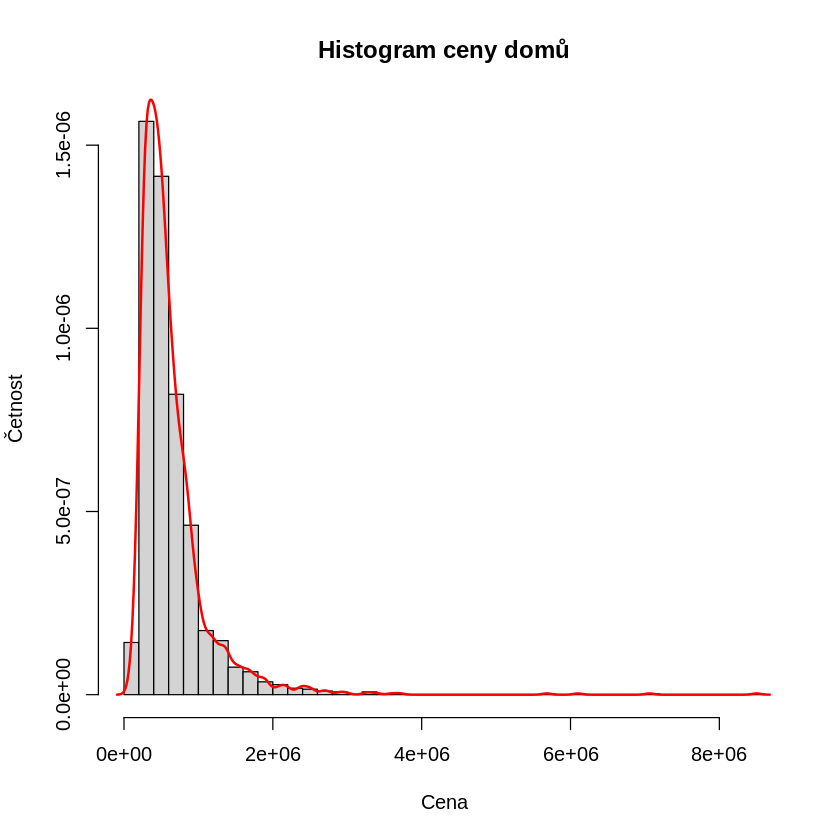

In [27]:
str(house_rad)
summary(house_rad)

hist(house_rad$price, prob = TRUE, xlab = "Cena", ylab = "Četnost", main = "Histogram ceny domů", breaks = 40)
lines(density(house_rad$price), col = 'red', lwd = 2)


Z obrázku je patrné, že proložená přímka histogramem není tvaru normálního rozdělení z důvodu chvostů na pravé straně. Vylepšení můžeme dosáhnout zlogaritmováním proměnné, jak je vidět na dalším obrázku.

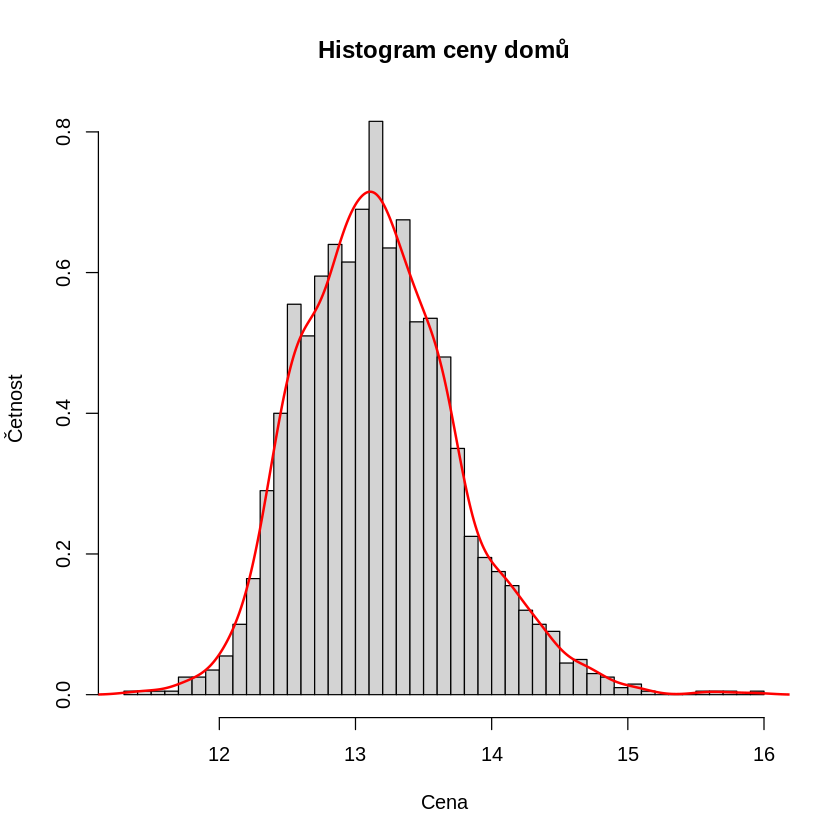

In [28]:
#vytvoření uniformního rozdělení
hist(log(house_rad$price), prob = TRUE, xlab = "Cena", ylab = "Četnost", main = "Histogram ceny domů", breaks = 40)
lines(density(log(house_rad$price)), col = 'red', lwd = 2)

* Otázka 02

  Jsou všechny proměnné použitelné pro analýzu a predikci ceny nemovitostí? Pokud data obsahují chybějící hodnoty, (případně nesmyslné hodnoty), lze je nějak nahradit (upravit), nebo musíme data odstranit?
  
  \

In [29]:
#zjistí celkový počet chybějících hodnot, jejich pozici pak lze najít příkazem which
sum(is.na(house_rad))

#vytvoření nového (vyfiltrovaného) datasetu
house <- house_rad

#jako proměnnou určující identifikaci máme id, nepotřebujeme X
house$X = NULL

#u domů bez renovace změníme hodnotu 0 na rok výstavby domu
house$yr_renovated[house$yr_renovated == 0] <- house$yr_built[house$yr_renovated == 0]

#faktorizace proměnných
house$waterfront = factor(house$waterfront)
house$view = factor(house$view)
house$condition = factor(house$condition)
house$bedrooms = factor(house$bedrooms)

[1] 0

Proměnných je celkem 19 s tím, že identifikaci jednotlivých pozorování obsahují dva sloupce, id a X. Odstraníme tedy proměnnou X. Data neobsahují žádné chybějící hodnoty. Ve sloupci roku poslední renovace jsou i hodnoty nulové, zřejmě z důvodu, že nebyla žádná renovace uskutečněna. Pro budoucí analýzu nastavíme u těchto hodnot rok renovace totožný s rokem výstavby domu. Dále je potřeba některé proměnné faktorizovat, zejména waterfront, view, condition a bedrooms. Problémem by však mohlo být znemožnění zařazení takového tvaru proměnných do korelační matice regresorů a následné hledaní multikolinearity podle Kappa. Podle proměnné split se dělí model na trénovací, testovací a validační data. Po tomto rozdělení modelu je potřeba proměnnou pro nějaké případy odstranit.

* Otázka 03
 
  Zkontrolujte pro 4 vybranné proměnné (price, sqft_living, grade, yr_built) bylo-li rozdělení datasetu pomocí proměnné split náhodné. Tj mají zmíněné proměnné ve skupinách train, test a validation přibližně stejné rozdělení?

\

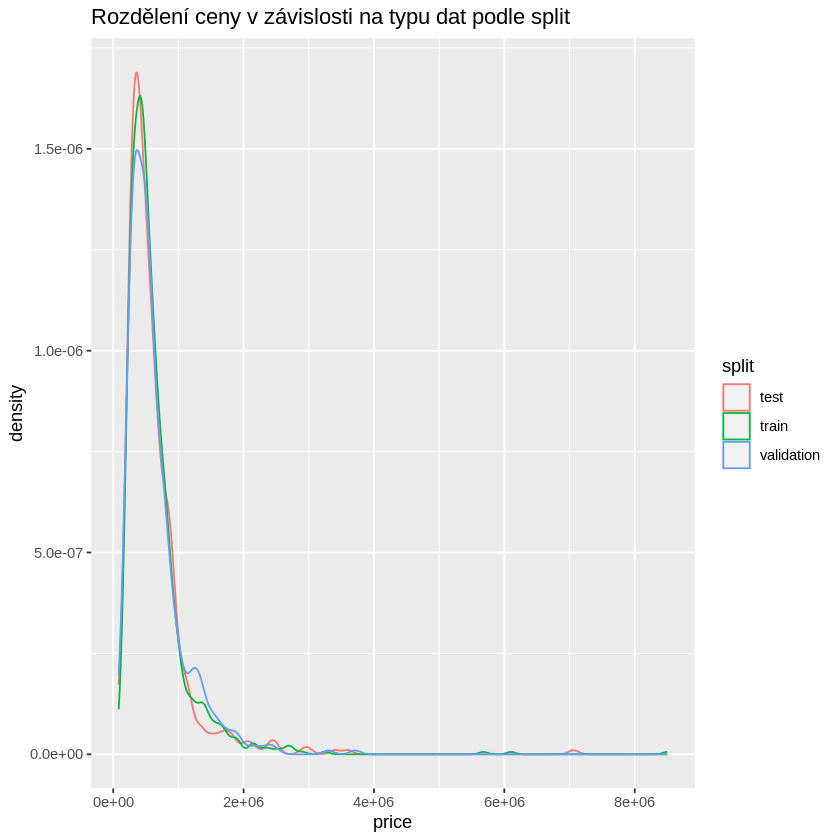

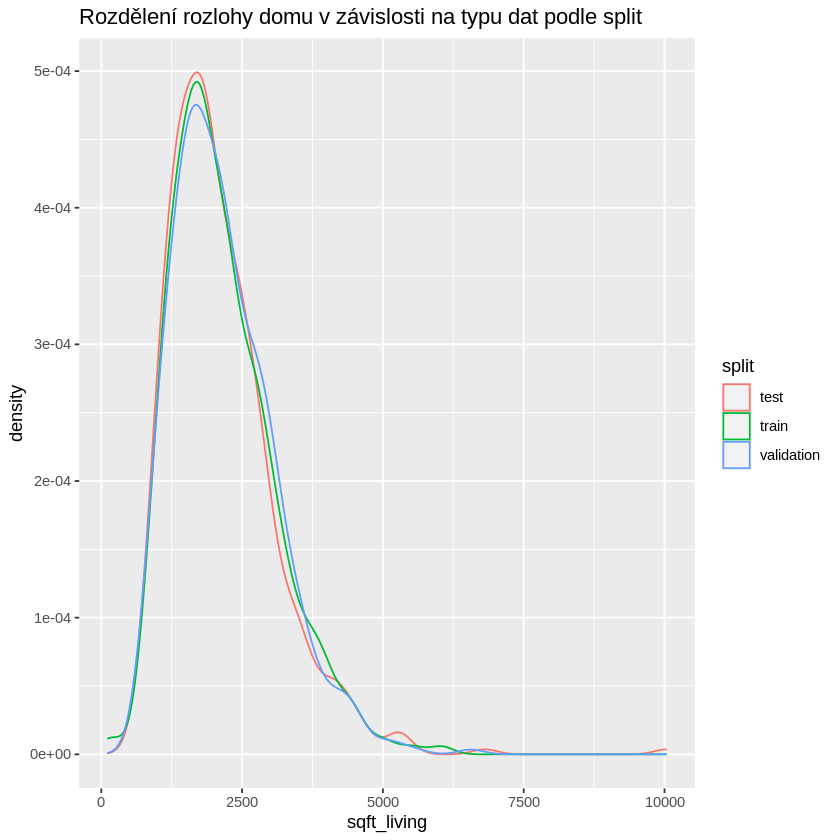

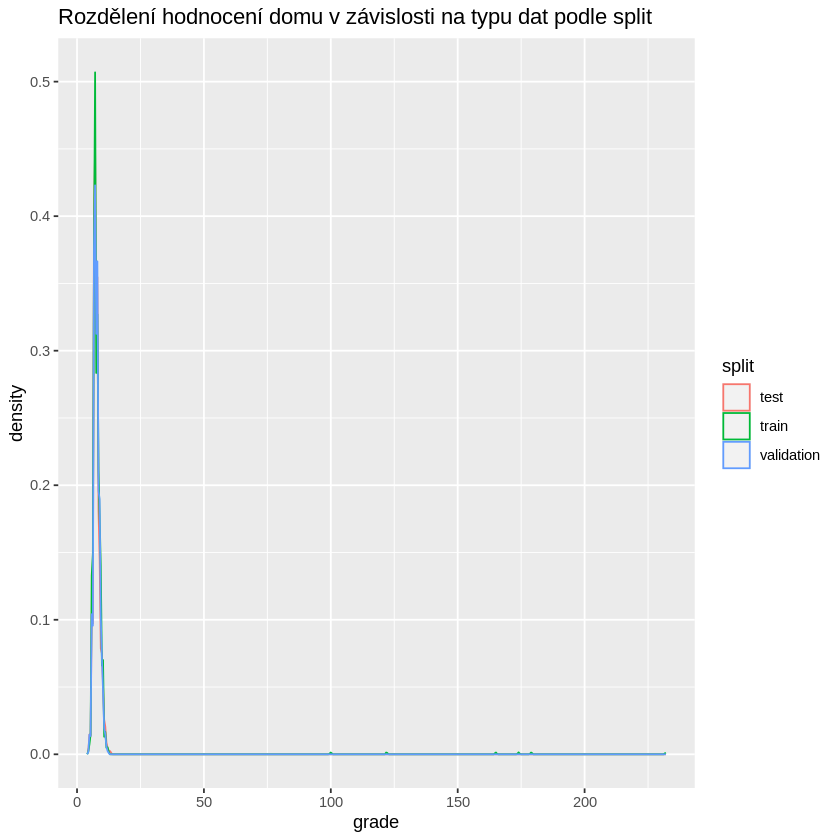

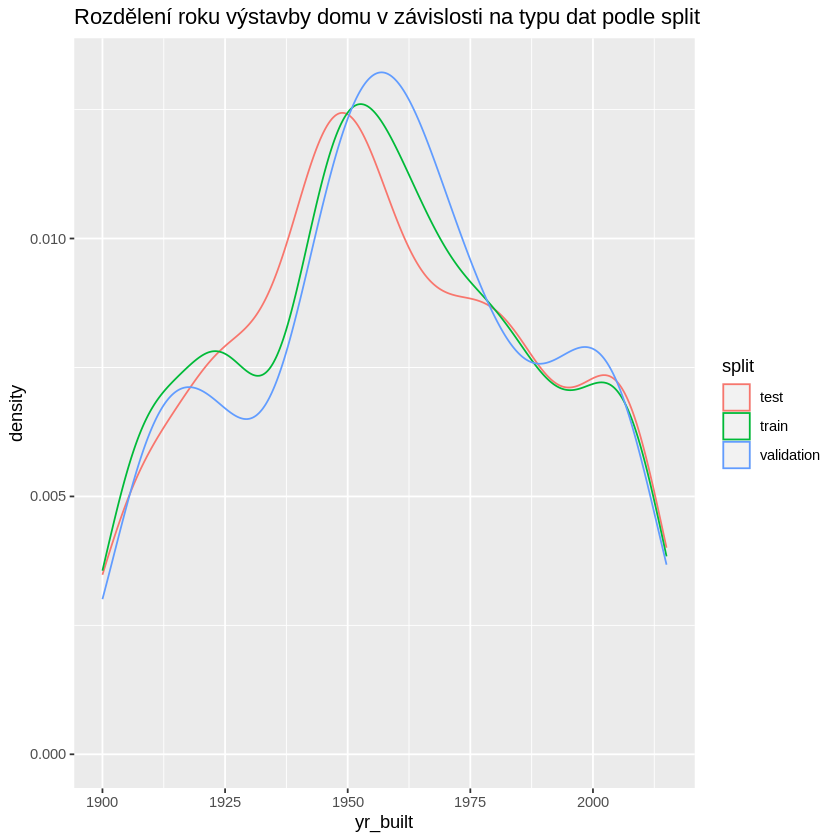

In [30]:
ggplot(house, aes(x=price, s = split, colour = split)) + geom_density() + ggtitle('Rozdělení ceny v závislosti na typu dat podle split')
ggplot(house, aes(x=sqft_living, s = split, colour = split)) + geom_density() + ggtitle('Rozdělení rozlohy domu v závislosti na typu dat podle split')
ggplot(house, aes(x=grade, s = split, colour = split)) + geom_density() + ggtitle('Rozdělení hodnocení domu v závislosti na typu dat podle split')
ggplot(house, aes(x=yr_built, s = split, colour = split)) + geom_density() + ggtitle('Rozdělení roku výstavby domu v závislosti na typu dat podle split')

Z grafů lze vyčíst, že pro první tři proměnné je rozdělení dat do skupin trénovacích, testovacích a validačních dat náhodné. Důvodem jsou přibližně stejná rozdělení proměnných pro tyto tři skupiny. Problém by mohl nastat u proměnné yr_built, kde se rozdělení jeví více odlišně. Avšak když srovnáme náhodnost rozdělení jako celek, tak jelikož zbytek proměnných vykazuje náhodnost zřejmou a zmiňovaná jedna proměnná s menší odchylkou, neměl by být problém.

## Lineární model (použijte pouze trénovací data, tj. split == "train"):

* Otázka 04

  Spočtěte korelace mezi jednotlivými regressory a graficky je znázorněte. Dále spočtěte číso podmmíněnosti matice regresorů Kappa a VIF. Pokud se v datech vyskytuje znatelná multicollinearita, rozhodněte jaké proměnné a proč použijete v následném linárním modelu.


,price,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.00000000,0.45085617,0.59182561,0.053010324,0.25222954,0.115777118,0.48838943,0.3427343184,-0.06076377,0.17364097,0.51472885,0.0546108606
bathrooms,0.45085617,1.00000000,0.72676432,0.086482706,0.49045375,0.074547106,0.64142197,0.3364298418,0.24972380,0.43783096,0.49624511,0.1032441682
sqft_living,0.59182561,0.72676432,1.00000000,0.197487943,0.37972362,-0.017639847,0.86609942,0.4731393782,0.14864523,0.29275568,0.69296266,0.2101944620
sqft_lot,0.05301032,0.08648271,0.19748794,1.000000000,0.01060927,0.008120547,0.21613624,0.0161674514,0.07228860,0.04821608,0.19315016,0.7899756229
floors,0.25222954,0.49045375,0.37972362,0.010609266,1.00000000,0.050046159,0.53144688,-0.1723168860,0.23638248,0.34978313,0.24839599,0.0108305971
grade,0.11577712,0.07454711,-0.01763985,0.008120547,0.05004616,1.000000000,0.05449027,0.0515376992,0.02427183,0.05744952,0.05410052,0.0042515629
sqft_above,0.48838943,0.64142197,0.86609942,0.216136240,0.53144688,0.054490268,1.00000000,-0.0210181077,0.26499062,0.30079437,0.66310640,0.2392214562
sqft_basement,0.34273432,0.33642984,0.47313938,0.016167451,-0.17231689,0.051537699,-0.02101811,1.0000000000,-0.17004202,0.06246249,0.22483872,0.0003514895
yr_built,-0.06076377,0.24972380,0.14864523,0.072288603,0.23638248,0.024271831,0.26499062,-0.1700420216,1.00000000,0.37141892,0.24761711,0.0829857904
yr_renovated,0.17364097,0.43783096,0.29275568,0.048216082,0.34978313,0.057449520,0.30079437,0.0624624867,0.37141892,1.00000000,0.22212262,0.0622785284


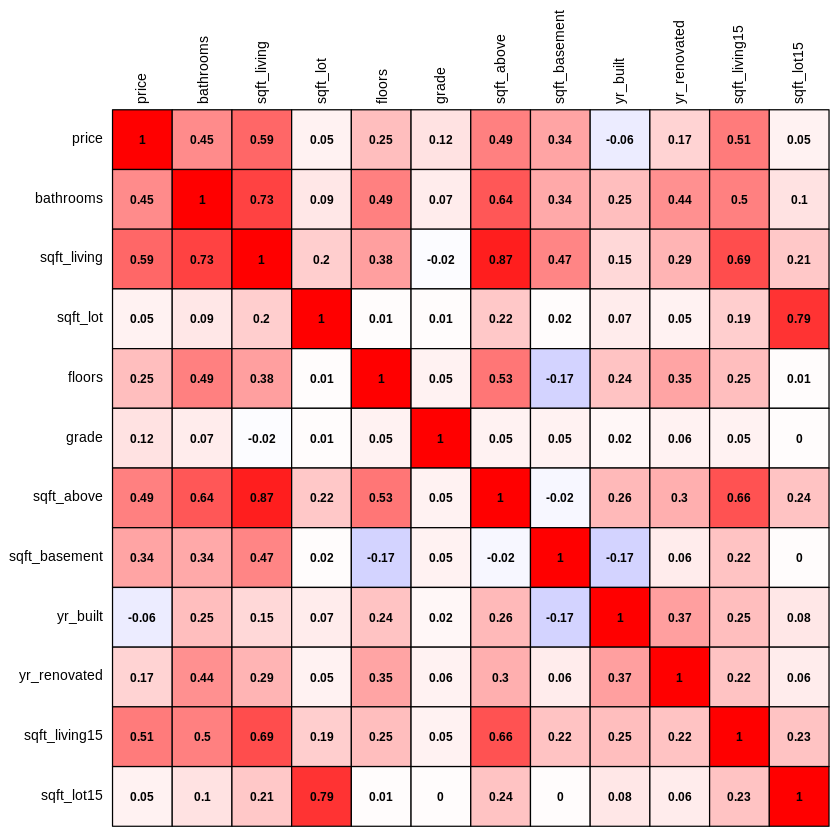

In [31]:
#odstraníme pozorování id, split a pozorování faktorizovaná
corr = cor(subset(house, select = -c(1,3,8,9,10,18)))
corr
corrplot(corr, method = "color", outline = T, cl.pos = 'n', rect.col = "black",  tl.col = "black", addCoef.col = "black", number.digits = 2, number.cex = 0.60, tl.cex = 0.7, cl.cex = 1, col = colorRampPalette(c("blue","white","red"))(100))

In [32]:
kappa(corr)
model0 <- lm(price ~ . -id -split, data = house)
vif(model0)

[1] 207574.9

,GVIF,Df,GVIF^(1/(2*Df))
bedrooms,1.840023,4,1.079202
bathrooms,2.971906,1,1.723922
sqft_living,21300.385856,1,145.946517
sqft_lot,2.705606,1,1.644873
floors,1.826787,1,1.351587
waterfront,1.870669,1,1.367724
view,2.407631,4,1.116089
condition,7.007625,4,1.275547
grade,166.350159,1,12.897680
sqft_above,16404.653279,1,128.080651


Z vysokých hodnot Kappa a VIF je vidět, že se v datech vyskytuje znatelná multikolinearita. Problém vykazují především proměnné sqft_living, sqft_above a sqft_basement. Jedná se o proměnné rozlohy, mezi nimiž je logická závislost. Proměnná rozlohy domu je totiž součtem zbylých dvou proměnných, a to rozlohy domu bez sklepu a rozlohy sklepu. Z vykreslené "heatmapy" je také vidět korelace mezi těmito proměnnými. Podíváme se na hodnoty Kappa a VIF po odstranění proměnných rozlohy domu bez sklepu a rozlohy sklepu. Celkovou rozlohu domu ponecháme.

In [33]:
corr1 = cor(subset(house, select = -c(1,3,8,9,10,12,13,18)))
kappa(corr1)
model1 <- lm(price ~ . -id -split -sqft_above -sqft_basement, data = house)
vif(model1)

[1] 14.38727

,GVIF,Df,GVIF^(1/(2*Df))
bedrooms,1.785545,4,1.075156
bathrooms,2.881748,1,1.697571
sqft_living,3.745538,1,1.935339
sqft_lot,2.701918,1,1.643751
floors,1.411105,1,1.187899
waterfront,1.855300,1,1.362094
view,2.285642,4,1.108858
condition,6.322421,4,1.259246
grade,4.817255,1,2.194825
yr_built,1.329232,1,1.152923


Odstraněním proměnných sqft_above a sqft_basement dostáváme podle hodnot Kappa a VIF model nezatížený multikolinearitou, s nímž budeme pracovat i nadále. Můžeme si povšimnout, že proměnná grade již vykazuje podle VIF hodnotu dostatečně malou oproti předchozímu modelu, kde by mohla být také adeptem na vyřazení.

* Otázka 05
    
  Pouze pomocí trénovacích dat (tj., split == "train") a všech vybranných proměnných najděte vhodný lineární regresní model, který má za úkol predikovat co nejlépe cenu, tj. minimalizovat střední kvadratickou chybu (MSE). U výsledného modelu porovnejte VIF a Kappa s původní celkovou maticí regresorů.
  



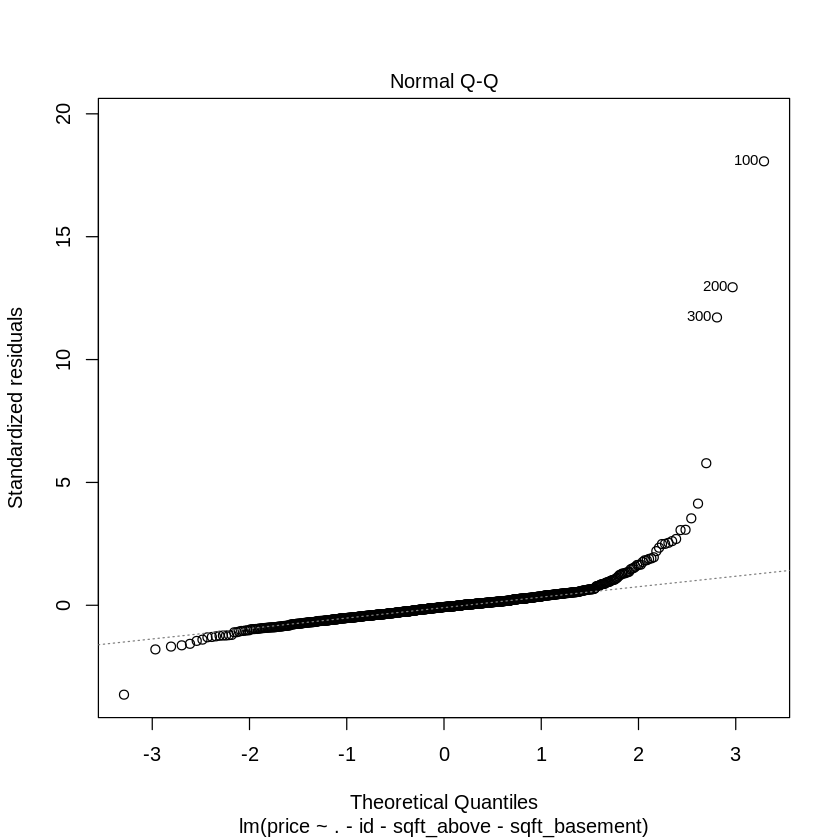

In [34]:
house_train <- filter(house, split == "train")
house_train$split = NULL

model2 <- lm(price ~ . -id -sqft_above -sqft_basement, data = house_train)
plot(model2, which=2)

Tento esovitý tvar QQ plotu pro rezidua poukazuje na problém s těžkými chvosty. Již při vykreslení histogramů jsme zjistili, že logaritmická transformace proměnné price vykazuje výrazně lepší hodnoty. Porovnáme náš vybraný model z minulé úlohy s modelem s touto transformací pomocí QQ plotů.

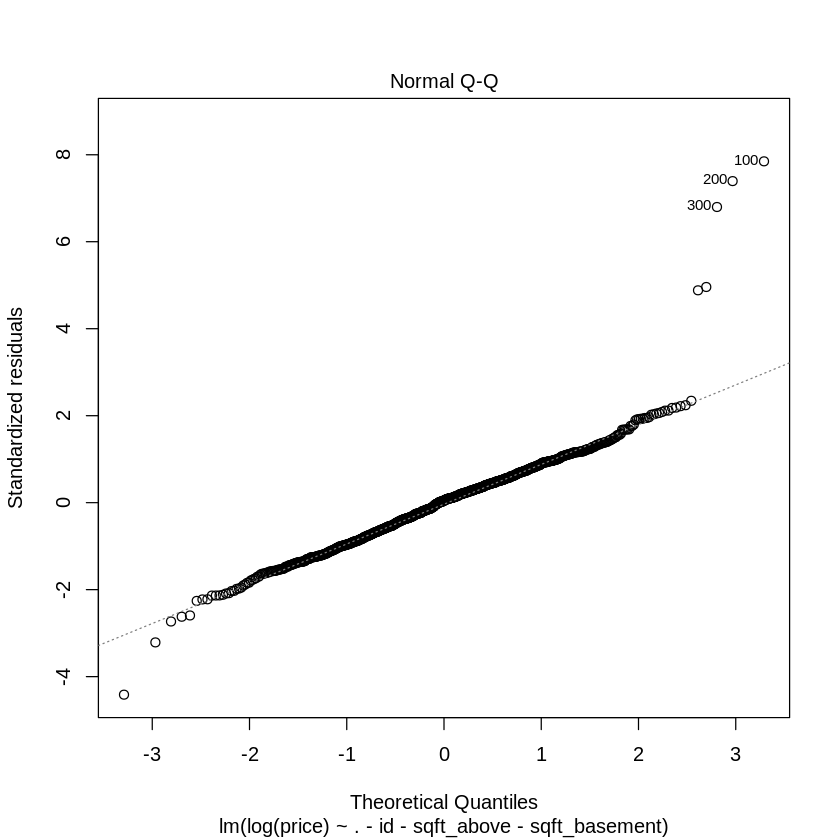

In [35]:
model3 <- lm(log(price) ~ . -id -sqft_above -sqft_basement, data = house_train)
plot(model3, which =2)

Jak jsme očekávali, model se nyní velmi blíží k normálnímu rozdělení, až na pár pozorování kopíruje téměř přesně požadovanou přímku.

In [36]:
#stepwise selection pomůže eliminovat nevýznamné proměnné v modelu
min.model = lm(log(price) ~ 1, data = house_train)
max.model = model3

auto.both <- step(min.model, direction = "both",scope = list(lower=min.model, upper=max.model),k=log(nobs(max.model)))

Start:  AIC=-1114.02
log(price) ~ 1

                Df Sum of Sq    RSS     AIC
+ sqft_living    1   131.958 194.02 -1626.0
+ sqft_living15  1   107.134 218.84 -1505.6
+ bathrooms      1    96.321 229.65 -1457.4
+ view           4    57.563 268.41 -1280.7
+ floors         1    36.673 289.30 -1226.5
+ bedrooms       4    38.956 287.02 -1213.7
+ yr_renovated   1    17.108 308.87 -1161.0
+ waterfront     1    12.571 313.41 -1146.4
+ grade          1     3.396 322.58 -1117.6
+ sqft_lot15     1     3.372 322.60 -1117.5
<none>                       325.98 -1114.0
+ sqft_lot       1     2.018 323.96 -1113.3
+ yr_built       1     1.243 324.73 -1110.9
+ condition      4     4.336 321.64 -1099.8

Step:  AIC=-1625.99
log(price) ~ sqft_living

                Df Sum of Sq    RSS     AIC
+ view           4    16.694 177.32 -1688.3
+ sqft_living15  1     9.868 184.15 -1671.3
+ yr_built       1     9.775 184.24 -1670.8
+ grade          1     8.605 185.41 -1664.5
+ waterfront     1     6.916 187.10 

Podle metody stepwise regression získáváme výsledný model tvaru log(price) ~ sqft_living + view + grade + yr_built + sqft_living15 + bathrooms + floors

In [37]:
model4 <- lm(log(price) ~ sqft_living + view + grade + yr_built + sqft_living15 + bathrooms + floors, data = house_train)
summary(model3)
summary(model4)

kappa(cor(subset(house_rad, select = c(5,6,8,10,12,15,17))))
vif(model4)


Call:
lm(formula = log(price) ~ . - id - sqft_above - sqft_basement, 
    data = house_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19675 -0.24338  0.01767  0.21627  2.90880 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.777e+01  1.352e+00  13.144  < 2e-16 ***
bedrooms3     -9.591e-03  4.140e-02  -0.232 0.816824    
bedrooms4     -1.297e-02  4.845e-02  -0.268 0.788956    
bedrooms5     -1.281e-01  6.464e-02  -1.981 0.047886 *  
bedrooms6     -2.607e-01  1.062e-01  -2.453 0.014330 *  
bathrooms      1.473e-01  2.590e-02   5.687 1.71e-08 ***
sqft_living    1.688e-04  2.702e-05   6.246 6.26e-10 ***
sqft_lot       3.781e-07  4.163e-07   0.908 0.364014    
floors         1.090e-01  2.712e-02   4.020 6.27e-05 ***
waterfront1    2.525e-01  1.185e-01   2.131 0.033377 *  
view1          1.284e-01  7.375e-02   1.742 0.081903 .  
view2          9.718e-02  5.184e-02   1.875 0.061143 .  
view3          2.024e-01  6.189e-02   3.271 0


Call:
lm(formula = log(price) ~ sqft_living + view + grade + yr_built + 
    sqft_living15 + bathrooms + floors, data = house_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25448 -0.24410  0.00983  0.22854  2.98828 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.107e+01  8.425e-01  25.011  < 2e-16 ***
sqft_living    1.518e-04  2.513e-05   6.041 2.17e-09 ***
view1          1.371e-01  7.427e-02   1.846   0.0652 .  
view2          1.253e-01  5.202e-02   2.408   0.0162 *  
view3          2.463e-01  6.207e-02   3.968 7.78e-05 ***
view4          3.929e-01  7.345e-02   5.350 1.09e-07 ***
grade          4.871e-03  1.002e-03   4.862 1.35e-06 ***
yr_built      -4.747e-03  4.406e-04 -10.773  < 2e-16 ***
sqft_living15  2.422e-04  2.686e-05   9.020  < 2e-16 ***
bathrooms      1.487e-01  2.454e-02   6.060 1.94e-09 ***
floors         1.280e-01  2.691e-02   4.756 2.27e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ 

[1] 11.88127

,GVIF,Df,GVIF^(1/(2*Df))
sqft_living,3.694108,1,1.922006
view,1.267555,4,1.030080
grade,1.068526,1,1.033695
yr_built,1.278169,1,1.130561
sqft_living15,2.333114,1,1.527454
bathrooms,2.538931,1,1.593402
floors,1.342719,1,1.158757


Nejsem si jista, zda jsem pochopila zadání s porovnáním VIF a Kappa. Každopádně z těchto hodnot vidíme, že hodnoty nevykazují multikolinearitu.

* Otázka 06

   Pro Vámi vybraný model z předešlé otázky spočtěte příslušné infulenční míry. Uveďtě id pro 20 pozorování s největší hodnotou DIFF, největší hodnotou leverage (hatvalues) a největší hodnotou Cookovy vzdálenosti. (tj, 3 krát 20 hodnot). Jaká pozorování považujete za vlivná a odlehlá pozorování.


In [38]:
sort(abs(dffits(model4)), decreasing = T)[1:20]
sort(hatvalues(model4), decreasing = T)[1:20]
sort(cooks.distance(model4),decreasing = T)[1:20]

a = sort(abs(dffits(model4)), decreasing = T, index.return=T)$ix
b = sort(hatvalues(model4), decreasing = T, index.return=T)$ix
c = sort(cooks.distance(model4),decreasing = T, index.return=T)$ix
rbind(DIFF = a[1:20],
      leverage = b[1:20],
      Cook = c[1:20])

#qf(.5, df1=8, df2=992)

500       900       800       200       300       100       700        41 
2.3073537 1.4498294 1.0092734 0.9479934 0.8038486 0.5362641 0.4589367 0.4547063 
      918       637       776       820       600       360       946       818 
0.4375220 0.4268186 0.4026042 0.4008066 0.3479764 0.3429014 0.3321690 0.3289622 
      967       282       763       777 
0.3222419 0.3200845 0.3144753 0.2962871

900        700        500        800        600       1000        583 
0.33582240 0.19542426 0.18286262 0.16480629 0.09114875 0.06188458 0.05338049 
        35        862        897        410         25        829        103 
0.04790468 0.04702428 0.04647522 0.04560494 0.04502210 0.04467254 0.04399933 
       918        106        375        639         87        239 
0.04358215 0.04342562 0.04306355 0.04305263 0.04246370 0.04208462

500         900         800         200         300         100 
0.473087502 0.190483289 0.092214901 0.077439169 0.056133914 0.024531462 
        700          41         918         637         776         820 
0.019150107 0.018706697 0.017346177 0.016508138 0.014689735 0.014562913 
        600         360         946         818         967         282 
0.011005654 0.010655867 0.010010116 0.009774393 0.009424079 0.009298830 
        763         777 
0.008963126 0.007965108

DIFF,500,900,800,200,300,100,700,41,918,637,776,820,600,360,946,818,967,282,763,777
leverage,900,700,500,800,600,1000,583,35,862,897,410,25,829,103,918,106,375,639,87,239
Cook,500,900,800,200,300,100,700,41,918,637,776,820,600,360,946,818,967,282,763,777


O tom, zda jsou pozorování vlivná, rozhodují následující pravidla, přičemž počet proměnných v modelu $m = 7$ a počet pozorování je $n = 1000$ (trénovací množina dat). 

Pro hodnotu DIFF dostaneme:

\begin{align}
        |DIFF_i| > 3  \sqrt{\frac{m + 1}{n-m-1}} \dot{=} 0.27,
    \end{align}

Pro hodnotu leverage dostaneme:

\begin{align}
        h_{ii} > 3 \frac{m+1}{n} \dot{=} 0.024.
    \end{align}


Pro Cookovu vzdálenost dostaneme:

\begin{align}
        D_i > F_{\frac{1}{2}}(m+1,n-m-1) \dot{=} 0.919,
    \end{align}

Tedy za vlivná pozorování lze podle DIFF považovat všech největších 20 hodnot, které jsme si vypsali. Podle leverage jsou opět vlivná všechna pozorování z 20ti. Naopak žádná z hodnot pro Cookovu vzdálenost není větší než 0.918, tudíž nejsou vlivné žádné.

* Otázka 07

  Validujte model pomocí grafického znázornění reziduí (Residual vs Fitted, QQ-plot, Cookova vzdálenost, Leverages, ...).
  Identifikovali jste na základě této a předchozí otázky v datech nějaká podezřelá pozorování, která mohla vzniknout při úpravě (přepisu) datasetu? Doporučili byste tato pozorování z dat odstranit?

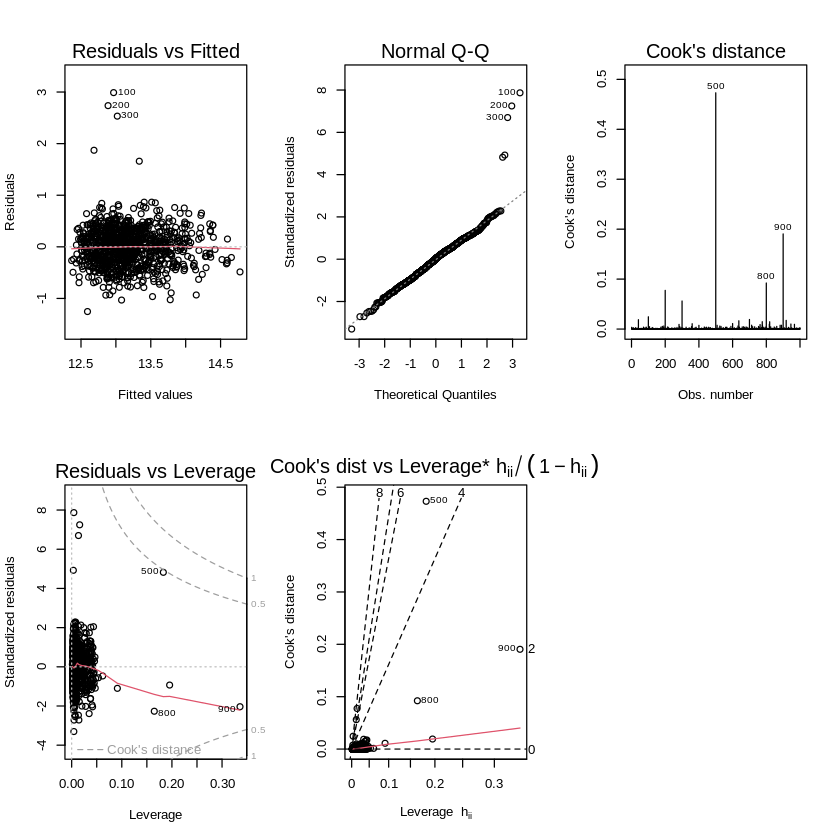

In [39]:
par(mfrow=c(2,3))
plot(model4, which=c(1,2,4,5,6))

Z grafů je patrné, že rezidua jsou přibližně normálně rozdělená. Odstranila bych však pozorování, která se liší od ostatních a podle DIFF spolu s leverage byla vyhodnocena jako vlivná. Jedná se především o pozorování 100, 200, 300, 500, 800 a 900.

## Train, test, validation ...:  (možno vynechat pokud si jste jisti počtem bodů na zápočet)

* Otázka 08

  Pokud jste se rozhodli z dat odstranit nějaká pozorování, tak dále pracujtes s vyfiltrovaným datasetem a přetrénujte model z otázky 5. A spočtěte pro tento model $R^2$ statistiku a MSE jak na trénovacích tak testovacích datech (split == "test"). 


Call:
lm(formula = log(price) ~ sqft_living + view + grade + yr_built + 
    sqft_living15 + bathrooms + floors, data = house_remove_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24166 -0.23624  0.01201  0.23245  1.88116 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.127e+01  7.646e-01  27.818  < 2e-16 ***
sqft_living    1.658e-04  2.275e-05   7.288 6.43e-13 ***
view1          1.374e-01  6.713e-02   2.046  0.04099 *  
view2          1.386e-01  4.728e-02   2.930  0.00346 ** 
view3          2.449e-01  5.610e-02   4.365 1.41e-05 ***
view4          3.971e-01  6.639e-02   5.982 3.09e-09 ***
grade          4.853e-03  1.528e-03   3.176  0.00154 ** 
yr_built      -4.846e-03  3.997e-04 -12.126  < 2e-16 ***
sqft_living15  2.451e-04  2.432e-05  10.080  < 2e-16 ***
bathrooms      1.453e-01  2.221e-02   6.542 9.77e-11 ***
floors         1.005e-01  2.459e-02   4.089 4.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’


Call:
lm(formula = log(price) ~ sqft_living + view + grade + yr_built + 
    sqft_living15 + bathrooms + floors, data = house_remove_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98474 -0.18054  0.02537  0.21016  0.87100 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.114e+01  9.655e-01  21.898  < 2e-16 ***
sqft_living    1.554e-04  2.649e-05   5.865 8.26e-09 ***
view1          2.405e-01  8.897e-02   2.703  0.00712 ** 
view2          1.410e-01  7.117e-02   1.981  0.04810 *  
view3         -4.740e-02  9.169e-02  -0.517  0.60539    
view4          3.577e-01  7.976e-02   4.485 9.09e-06 ***
grade          2.048e-01  1.993e-02  10.276  < 2e-16 ***
yr_built      -5.265e-03  5.077e-04 -10.371  < 2e-16 ***
sqft_living15  1.260e-04  3.026e-05   4.163 3.71e-05 ***
bathrooms      5.671e-02  2.949e-02   1.923  0.05511 .  
floors         9.321e-03  3.239e-02   0.288  0.77360    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

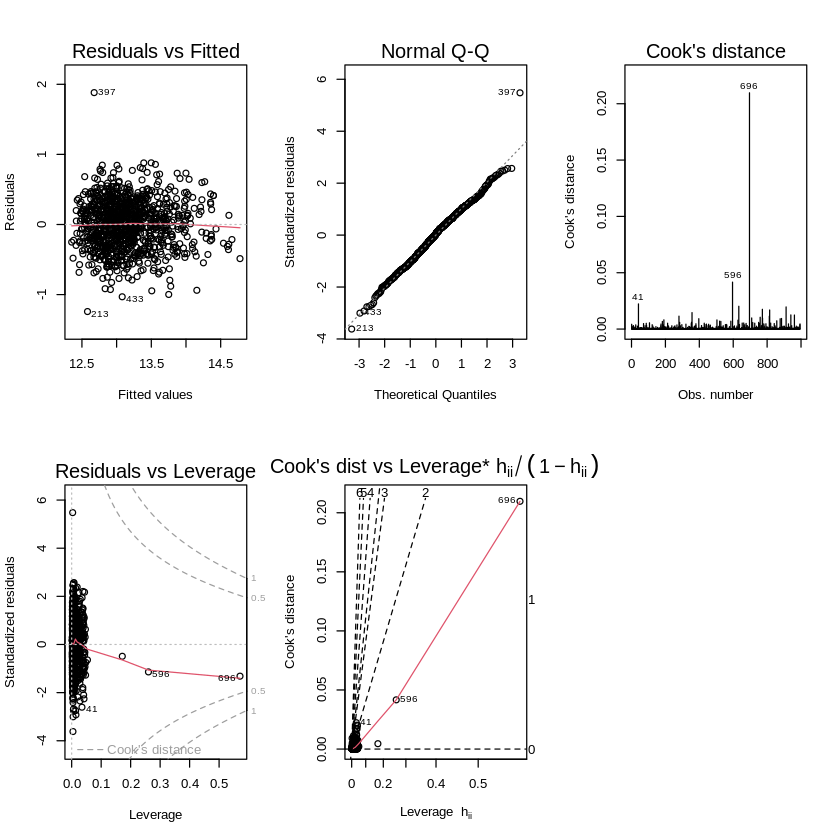

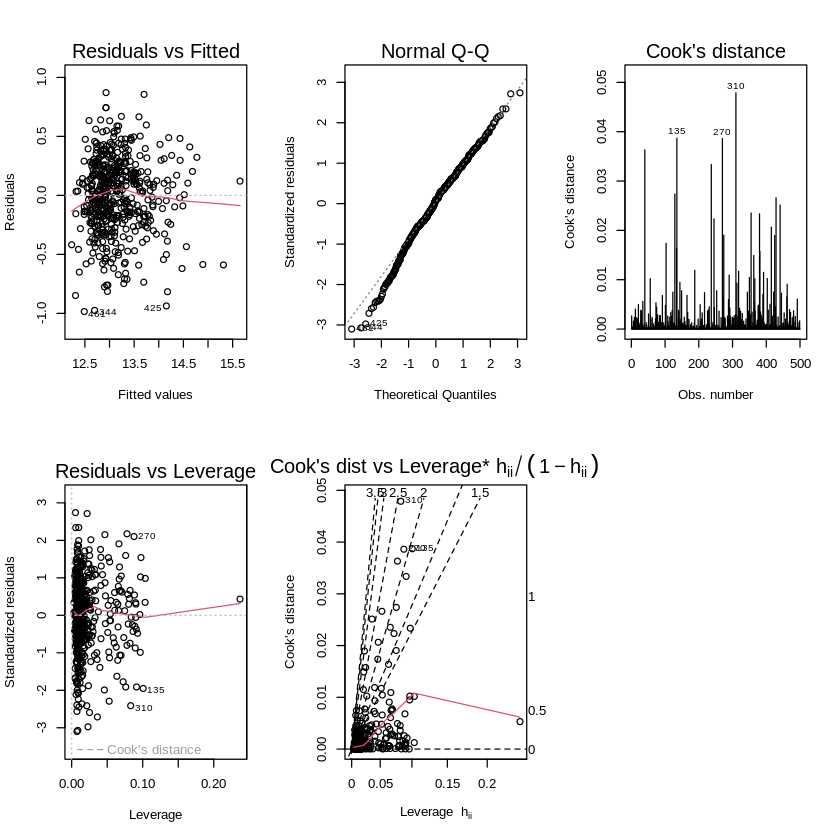

In [40]:
house_remove <- house[- c(100, 200, 300, 500, 800, 900),]
house_remove_train <- filter(house_remove, split == "train")
house_remove_test <- filter(house_remove, split == "test")

model5 <- lm(log(price) ~ sqft_living + view + grade + yr_built + sqft_living15 + bathrooms + floors, data = house_remove_train)
model6 <- lm(log(price) ~ sqft_living + view + grade + yr_built + sqft_living15 + bathrooms + floors, data = house_remove_test)

par(mfrow=c(2,3))
plot(model5, which=c(1,2,4,5,6))

par(mfrow=c(2,3))
plot(model6, which=c(1,2,4,5,6))

summary(model5)
summary(model6)

Model nyní vykazuje pro trénovací data o něco lepší hodnoty $R^2$ statistiky, F-statistiky i MSE. Testovací data mají dokonce lepší hodnoty než trénovací, až na F-statistiku, která má hodnotu nižší. A dalším hraním si s modelem v podobě odstraňování dalších pozorování jsem získala o něco lepší model:


Call:
lm(formula = log(price) ~ sqft_living + view + grade + yr_built + 
    sqft_living15 + bathrooms + floors, data = h_t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93944 -0.20701  0.01447  0.20639  0.84236 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.186e+01  6.684e-01  32.707  < 2e-16 ***
sqft_living    7.370e-05  2.058e-05   3.581 0.000359 ***
view1          1.115e-01  5.919e-02   1.884 0.059894 .  
view2          1.194e-01  4.109e-02   2.906 0.003741 ** 
view3          1.867e-01  4.887e-02   3.820 0.000142 ***
view4          3.382e-01  5.777e-02   5.855 6.52e-09 ***
grade          2.176e-01  1.344e-02  16.196  < 2e-16 ***
yr_built      -5.676e-03  3.520e-04 -16.126  < 2e-16 ***
sqft_living15  1.294e-04  2.230e-05   5.801 8.92e-09 ***
bathrooms      1.172e-01  1.945e-02   6.025 2.39e-09 ***
floors         3.091e-02  2.195e-02   1.408 0.159484    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Res

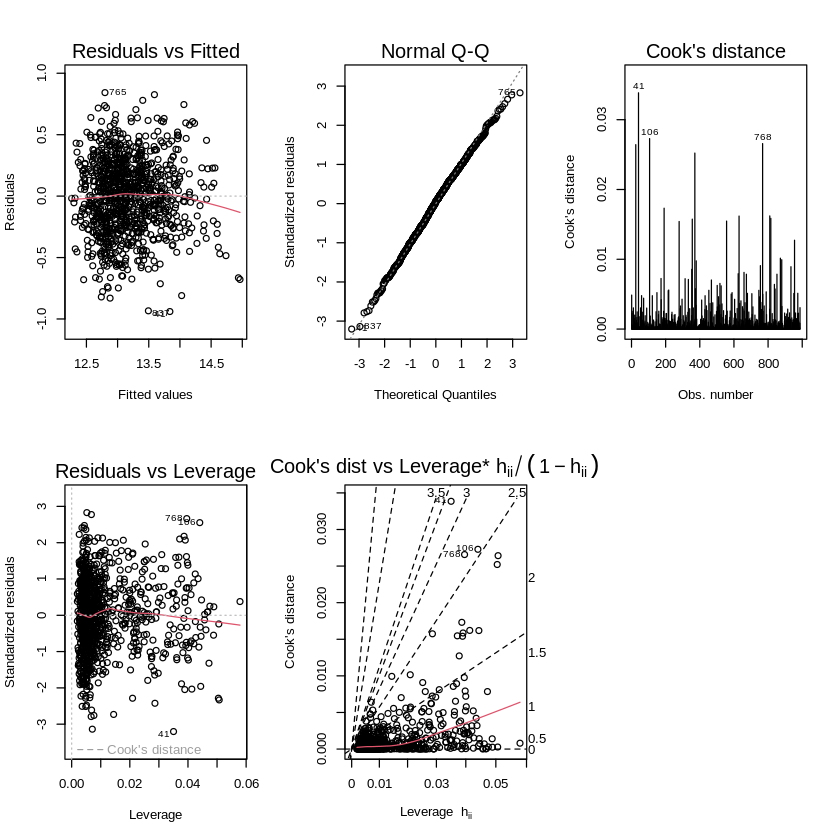

In [41]:
h <- house[-c(100, 200, 215, 300, 400, 500, 600, 700, 800, 818, 900, 918, 1000),]
h_t <- filter(h, split == "train")
model7 <- lm(log(price) ~ sqft_living + view + grade + yr_built + sqft_living15 + bathrooms + floors, data = h_t)

par(mfrow=c(2,3))
plot(model7, which=c(1,2,4,5,6))

summary(model7)

* Otázka 09

  Pomocí hřebenové regrese (případně pomocí LASSO a Elastic Net) zkuste najít nejlepší hyperparametr(y) tak, aby výsledný model měl co nejmenší MSE na testovacích datech.  

* Otázka 10

  Vyberte výsledný model a porovnejte MSE a $R^2$ na trénovacích, testovacích a validačních datech. Co z těchto hodnot usuzujete o kvalitě modelu a případném přetrénování? Je váš model vhodný pro predikci cen nemovitostí v okolí King County? Pokud ano, má tato predikce nějaká omezeni?